In [0]:
import pandas as pd 
import numpy as np
import os
import sklearn
import matplotlib as plt

In [0]:
import matplotlib.pyplot as plt

In [0]:
#!pip install nltk
#nltk.download()
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [0]:
from textblob import TextBlob

In [0]:
#os.chdir('E:\\Profond Ananlytics\\Course material\\NLP')

In [0]:
df=pd.read_csv('Reviews.csv')

In [91]:
#Summary
df.describe()

,label
count,10000.000000
mean,1.490300
std,0.499931
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [92]:
#Head of dataset
df.head(10)

,label,Review
0,2,Stuning even for the non-gamer: This sound tr...
1,2,The best soundtrack ever to anything.: I'm re...
2,2,Amazing!: This soundtrack is my favorite musi...
3,2,Excellent Soundtrack: I truly like this sound...
4,2,"Remember, Pull Your Jaw Off The Floor After H..."
5,2,an absolute masterpiece: I am quite sure any ...
6,1,"Buyer beware: This is a self-published book, ..."
7,2,Glorious story: I loved Whisper of the wicked...
8,2,A FIVE STAR BOOK: I just finished reading Whi...
9,2,Whispers of the Wicked Saints: This was a eas...


In [93]:
#Converting to lower case

df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'].head()

0    stuning even for the non-gamer: this sound tra...
1    the best soundtrack ever to anything.: i'm rea...
2    amazing!: this soundtrack is my favorite music...
3    excellent soundtrack: i truly like this soundt...
4    remember, pull your jaw off the floor after he...
Name: Review, dtype: object

In [94]:
#Removal of special characters

df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: Review, dtype: object

In [81]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [95]:
#Removal of Stop words

stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'].head()

0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hands i...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
Name: Review, dtype: object

In [96]:
#Spelling Corection

df['Review'][:10].apply(lambda x: str(TextBlob(x).correct()))
df['Review'].head(10)

0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hands i...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
5    absolute masterpiece quite sure actually takin...
6    buyer beware selfpublished book want know whyr...
7    glorious story loved whisper wicked saints sto...
8    five star book finished reading whisper wicked...
9    whispers wicked saints easy read book made wan...
Name: Review, dtype: object

In [79]:
df.head()

,label,Review
0,2,stuning even nongamer sound track beautiful pa...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hands i...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing youve played g...


In [82]:
word_tokenize('asas asas asasjndsadkn sdsadkmnkas')

['asas', 'asas', 'asasjndsadkn', 'sdsadkmnkas']

In [0]:
#Tokenization
#df['Review']=df['Review'].apply(lambda x: str(TextBlob(x).words))
#df.head()

In [98]:
#Stemming 
st = PorterStemmer()
df['Review']=df['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Review'].head()

0    stune even nongam sound track beauti paint sen...
1    best soundtrack ever anyth im read lot review ...
2    amaz soundtrack favorit music time hand intens...
3    excel soundtrack truli like soundtrack enjoy v...
4    rememb pull jaw floor hear youv play game know...
Name: Review, dtype: object

In [88]:
#nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
#lemetization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [97]:
#df['tweet']=df.apply(lambda x: lemmatizer.lemmatize(x["tweet"]))
df['Review'] = df['Review'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))
df['Review'].head(10)

0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hand in...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
5    absolute masterpiece quite sure actually takin...
6    buyer beware selfpublished book want know whyr...
7    glorious story loved whisper wicked saint stor...
8    five star book finished reading whisper wicked...
9    whisper wicked saint easy read book made want ...
Name: Review, dtype: object

In [100]:
#N gram

TextBlob("I am learning NLP").ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [0]:
test1 = "extreme weather" 
test2 = "hate love"
test3 = "delevery"

In [105]:
blob = TextBlob("This is not bad")

blob.sentiment

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [106]:
# Sentiment Analysis
df['sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment[0]) 
df.head()

,label,Review,sentiment
0,2,stune even nongam sound track beauti paint sen...,-0.144444
1,2,best soundtrack ever anyth im read lot review ...,0.420000
2,2,amaz soundtrack favorit music time hand intens...,0.111458
3,2,excel soundtrack truli like soundtrack enjoy v...,0.085714
4,2,rememb pull jaw floor hear youv play game know...,0.425000


In [107]:
df.head(15)

,label,Review,sentiment
0,2,stune even nongam sound track beauti paint sen...,-0.144444
1,2,best soundtrack ever anyth im read lot review ...,0.420000
2,2,amaz soundtrack favorit music time hand intens...,0.111458
3,2,excel soundtrack truli like soundtrack enjoy v...,0.085714
4,2,rememb pull jaw floor hear youv play game know...,0.425000
5,2,absolut masterpiec quit sure actual take time ...,0.242208
6,1,buyer bewar selfpublish book want know whyread...,0.030000
7,2,gloriou stori love whisper wick saint stori am...,0.508333
8,2,five star book finish read whisper wick saint ...,0.333333
9,2,whisper wick saint easi read book made want ke...,0.200000


In [0]:
#extracting first 50 rows to build a word cloud
text=df['Review'].head(50)

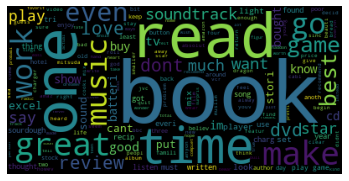

In [109]:
#Building a word Cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(text.str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black', 
                      max_words=300
                         ).generate(word_string)

plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


matrix([[0.        , 0.39114469, 0.48314151, 0.31978642, 0.        ,
         0.        , 0.31978642, 0.        , 0.63957283],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.2)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
lb = LabelEncoder()

In [134]:
lb.fit_transform(X_train)

array([2, 2, 0, 1, 0])

In [135]:
lb.transform(X_test)

array([1, 0])

In [137]:
X_test

5    b
3    a
Name: X, dtype: object

In [136]:
X_train

6    c
2    c
4    a
1    b
0    a
Name: X, dtype: object